In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-dataset/Used Car Dataset.csv


perform EDA analysis

Load Data:


In [2]:
import pandas as pd
# Assuming your data is in a CSV file
data = pd.read_csv("/kaggle/input/used-car-dataset/Used Car Dataset.csv")


In [3]:
# Display first few rows of the data
print(data.head())


   Unnamed: 0                                           car_name  \
0           0                    2017 Mercedes-Benz S-Class S400   
1           1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI   
2           2                       2018 BMW X1 sDrive 20d xLine   
3           3                           2019 Kia Seltos GTX Plus   
4           4                    2019 Skoda Superb LK 1.8 TSI AT   

  registration_year insurance_validity fuel_type  seats  kms_driven  \
0            Jul-17      Comprehensive    Petrol      5       56000   
1            Jan-21      Comprehensive    Petrol      5       30615   
2            Sep-18      Comprehensive    Diesel      5       24000   
3            Dec-19      Comprehensive    Petrol      5       18378   
4            Aug-19      Comprehensive    Petrol      5       44900   

    ownsership transmission manufacturing_year  mileage(kmpl)  engine(cc)  \
0  First Owner    Automatic               2017           7.81      2996.0   
1  First O

In [4]:
# Get general information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

In [5]:
# Summary statistics
print(data.describe())

        Unnamed: 0         seats     kms_driven  mileage(kmpl)    engine(cc)  \
count  1553.000000   1553.000000    1553.000000    1550.000000  1.550000e+03   
mean    776.000000     91.480361   52841.931101     236.927277  1.471857e+10   
std     448.456798   2403.424060   40067.800347     585.964295  2.185629e+11   
min       0.000000      4.000000     620.000000       7.810000  5.000000e+00   
25%     388.000000      5.000000   30000.000000      16.342500  1.197000e+03   
50%     776.000000      5.000000   49134.000000      18.900000  1.462000e+03   
75%    1164.000000      5.000000   70000.000000      22.000000  1.995000e+03   
max    1552.000000  67000.000000  810000.000000    3996.000000  3.258640e+12   

       max_power(bhp)    torque(Nm)  price(in lakhs)  
count    1.550000e+03  1.549000e+03      1553.000000  
mean     1.471857e+10  1.423989e+04       166.141494  
std      2.185629e+11  9.666241e+04      3478.855090  
min      5.000000e+00  5.000000e+00         1.000000  
25% 

Handle Missing Values:
Use methods like isnull(), fillna() to handle missing values.

In [6]:
# Check for missing values
print(data.isnull().sum())



Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64


In [7]:

print(data.dtypes)

Unnamed: 0              int64
car_name               object
registration_year      object
insurance_validity     object
fuel_type              object
seats                   int64
kms_driven              int64
ownsership             object
transmission           object
manufacturing_year     object
mileage(kmpl)         float64
engine(cc)            float64
max_power(bhp)        float64
torque(Nm)            float64
price(in lakhs)       float64
dtype: object


In [8]:
data['mileage(kmpl)'].fillna(data['mileage(kmpl)'].mean(), inplace=True)
data['engine(cc)'].fillna(data['engine(cc)'].mean(), inplace=True)
data['max_power(bhp)'].fillna(data['max_power(bhp)'].mean(), inplace=True)
data['torque(Nm)'].fillna(data['torque(Nm)'].mean(), inplace=True)


In [9]:
print(data.isnull().sum())

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
engine(cc)            0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
dtype: int64


In [10]:
print(data.columns)

Index(['Unnamed: 0', 'car_name', 'registration_year', 'insurance_validity',
       'fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'price(in lakhs)'],
      dtype='object')


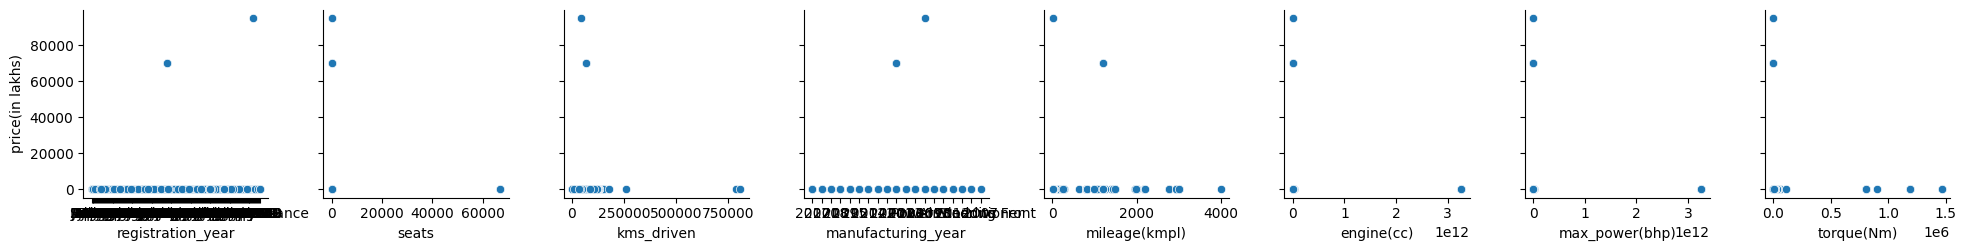

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features for exploration
features = ['registration_year', 'seats', 'kms_driven', 'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)']

# Create a pair plot to visualize relationships
sns.pairplot(data, x_vars=features, y_vars=['price(in lakhs)'])
plt.show()

Mean Squared Error: 29027011.357838646


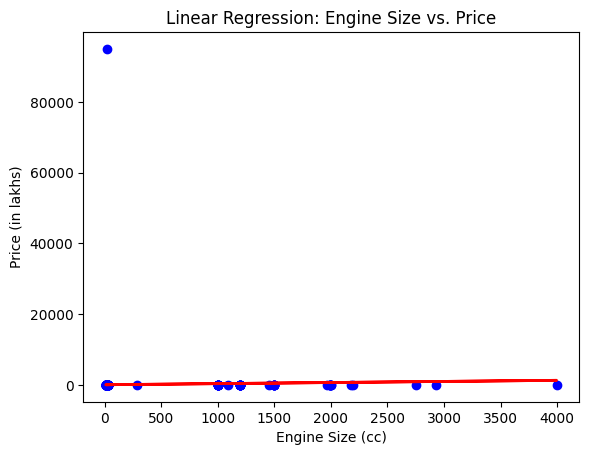

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'X' contains features and 'y' is the target variable
X = data[['mileage(kmpl)']]  # Replace with the selected feature(s)
y = data['price(in lakhs)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model on the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Engine Size (cc)')
plt.ylabel('Price (in lakhs)')
plt.title('Linear Regression: Engine Size vs. Price')
plt.show()



Lasso Regression:

In [13]:
from sklearn.linear_model import LassoCV

# Initialize Lasso Regression model with cross-validation
lasso_reg_model = LassoCV(cv=5)

# Fit the model on the training data
lasso_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_reg_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (Lasso): {mse_lasso}')


Mean Squared Error (Lasso): 28954423.285816535


 building a linear regression model,engine(cc)' seems to have a linear relationship:

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Convert 'registration_year' and 'manufacturing_year' to numeric (ignore errors)
data['registration_year'] = pd.to_numeric(data['registration_year'], errors='coerce')
data['manufacturing_year'] = pd.to_numeric(data['manufacturing_year'], errors='coerce')

# Drop rows with missing values after conversion
data = data.dropna(subset=['registration_year', 'manufacturing_year'])

# Select features and target variable
features = ['registration_year', 'seats', 'kms_driven', 'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)']
target_variable = 'price(in lakhs)'

X = data[features]
y = data[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model on the scaled training data
linear_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = linear_reg_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 49.49537376030591


Ridge Regression:

In [15]:
from sklearn.linear_model import RidgeCV

# Initialize Ridge Regression model with cross-validation
ridge_reg_model = RidgeCV(cv=5)

# Fit the model on the training data
ridge_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_reg_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')



Mean Squared Error (Ridge): 49.460046615227554
